### ✅ 데이터 증강 (Data Augmentation)과 전이 학습 (Transfer Learning) — 딥러닝 실전 핵심 기술

---

#### 📌 1. 데이터 증강 (Data Augmentation)

**데이터 증강**은 기존 학습 데이터를 다양한 방식으로 변형하여 **더 많은 훈련 샘플을 만드는 기법**이다.  
이는 모델이 더 일반화된 패턴을 학습하게 하여 **과적합(overfitting)을 줄이고 성능을 향상**시킨다.

##### 📷 이미지 데이터 증강 예시
| 증강 방법       | 설명                                               |
|----------------|----------------------------------------------------|
| `RandomCrop`   | 무작위로 이미지의 일부분을 잘라서 학습             |
| `RandomHorizontalFlip` | 좌우 반전                                     |
| `RandomRotation` | 일정 각도 범위 내에서 회전                         |
| `ColorJitter`  | 밝기, 채도, 대비 등을 무작위로 변경                |
| `Affine Transform` | 이동, 확대/축소, 기울이기 등 기하학적 변환      |
| `GaussianNoise` | 노이즈를 추가하여 잡음에 강한 모델 학습          |

##### ✍️ PyTorch 적용 예시
```python
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])
```

##### 효과
- 적은 데이터로도 강건한 모델 학습 가능
- 데이터 다양성이 증가해 테스트 정확도 향상

---

#### 📌 2. 전이 학습 (Transfer Learning)

**전이 학습**은 대규모 데이터셋(예: ImageNet)에서 미리 학습된 모델(ResNet, VGG 등)을  
**기존의 feature extractor로 활용**하고, 우리 목적에 맞게 일부 계층을 fine-tuning(미세조정)하는 전략이다.

##### 왜 필요한가?
- 훈련 데이터가 부족할 때, 사전 학습된 모델의 지식을 활용할 수 있음
- 처음부터 학습할 때보다 훨씬 빠르게 수렴하고 높은 정확도 달성 가능

##### 전이 학습 방식
| 방식                     | 설명                                                |
|--------------------------|-----------------------------------------------------|
| **Feature Extractor**    | 사전 학습된 모델의 가중치를 그대로 사용하고, 마지막 분류기만 새로 학습 |
| **Fine-Tuning**          | 일부 상위 계층의 가중치는 고정하고, 하위 계층부터 학습을 다시 수행     |
| **Full Retraining**      | 전체 계층을 초기화하지 않고 학습을 계속 이어감                   |

##### 예시: `torchvision.models.resnet18`
```python
from torchvision.models import resnet18

model = resnet18(pretrained=True)           # ImageNet 가중치 로드
model.fc = nn.Linear(512, num_classes)      # 마지막 분류기만 교체
```

---

#### 📈 증강 + 전이 학습 조합의 효과

- 증강 → 더 많은 데이터처럼 학습됨  
- 전이 학습 → 적은 데이터에서도 높은 성능 발휘  
→ 두 개를 조합하면 **데이터가 부족한 상황에서도 뛰어난 일반화 성능**을 달성할 수 있음

---

#### 🧠 실제 활용 예시

- 고양이 vs 강아지 분류 (작은 개인 이미지셋)
- 의료 이미지 (CT, X-ray 등 데이터 적고 수집 어려움)
- 산업/공장/품질검사 이미지 분류 (불균형 클래스 문제 해결)

---

#### ✅ 다음 실습 추천

1. `torchvision.datasets.ImageFolder`로 커스텀 이미지셋 불러오기
2. `transforms`로 데이터 증강 적용
3. `resnet18` 또는 `mobilenet_v2` 전이 학습 적용
4. 성능 비교: 증강 전/후, 전이 학습 전/후

--- 
```


In [3]:
import os, shutil, glob, random

# 원본 경로
source_dir = "data"
classes = ["cat", "dog"]
train_dir = "data_balanced/train"
val_dir = "data_balanced/val"

# 폴더 정리
for folder in [train_dir, val_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    for cls in classes:
        os.makedirs(os.path.join(folder, cls), exist_ok=True)

# 최소 클래스 기준으로 균형 맞추기
cat_imgs = glob.glob(f"{source_dir}/cat/*")
dog_imgs = glob.glob(f"{source_dir}/dog/*")
min_count = min(len(cat_imgs), len(dog_imgs))
cat_sample = random.sample(cat_imgs, min_count)
dog_sample = random.sample(dog_imgs, min_count)

# 분할 & 복사
def split_and_copy(img_list, cls):
    random.shuffle(img_list)
    train = img_list[:int(0.8 * len(img_list))]
    val   = img_list[int(0.8 * len(img_list)):]
    for f in train:
        shutil.copy(f, os.path.join(train_dir, cls, os.path.basename(f)))
    for f in val:
        shutil.copy(f, os.path.join(val_dir, cls, os.path.basename(f)))

split_and_copy(cat_sample, "cat")
split_and_copy(dog_sample, "dog")

print("✅ 완료: 1:1로 맞춰서 train/val 셋 분리함.")


✅ 완료: 1:1로 맞춰서 train/val 셋 분리함.


In [6]:
from PIL import Image
import os, glob

def check_and_delete_broken_images(folder):
    print(f"🔍 검사 중: {folder}")
    broken = []
    for file in glob.glob(f"{folder}/**/*.*", recursive=True):
        try:
            img = Image.open(file)
            img.verify()  # 파일이 실제 이미지인지 검사
        except Exception:
            print(f"❌ 삭제됨: {file}")
            broken.append(file)
            os.remove(file)  # 손상된 파일 제거
    print(f"\n✅ 총 삭제된 손상 이미지 수: {len(broken)}")

# 사용 예시
check_and_delete_broken_images("data_split/train")
check_and_delete_broken_images("data_split/val")


🔍 검사 중: data_split/train
❌ 삭제됨: data_split/train\cat\666.jpg
❌ 삭제됨: data_split/train\dog\11702.jpg

✅ 총 삭제된 손상 이미지 수: 2
🔍 검사 중: data_split/val


c:\study\python\dl\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))



✅ 총 삭제된 손상 이미지 수: 0


🔍 검사 중: data_split/train
❌ 삭제됨: data_split/train\cat\666.jpg
❌ 삭제됨: data_split/train\dog\11702.jpg
✅ 총 삭제된 손상 이미지 수: 2

🔍 검사 중: data_split/val
✅ 총 삭제된 손상 이미지 수: 0

📘 Epoch 1/10 - Loss: 0.2605
📘 Epoch 2/10 - Loss: 0.2155
📘 Epoch 3/10 - Loss: 0.2076
📘 Epoch 4/10 - Loss: 0.1939
📘 Epoch 5/10 - Loss: 0.1917
📘 Epoch 6/10 - Loss: 0.1795
📘 Epoch 7/10 - Loss: 0.1758
📘 Epoch 8/10 - Loss: 0.1714
📘 Epoch 9/10 - Loss: 0.1629
📘 Epoch 10/10 - Loss: 0.1672

✅ 최종 검증 정확도: 0.9686


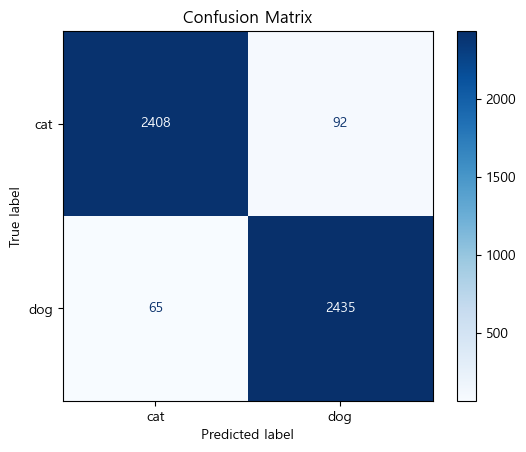

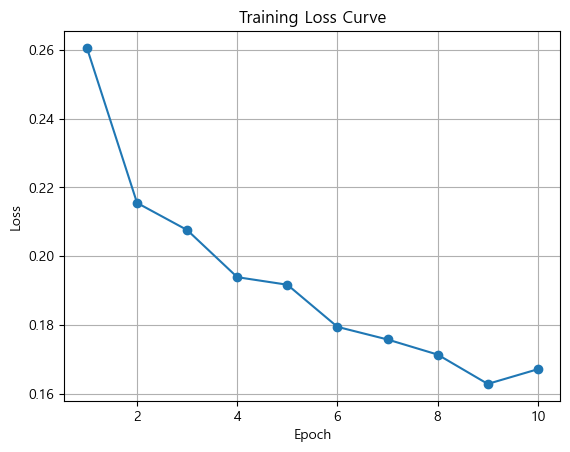

In [7]:
# 1. 필요한 패키지 불러오기
import os, shutil, glob, random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import matplotlib.pyplot as plt

# 2. 데이터 분할
source_dir = "data"
classes = ["cat", "dog"]
train_dir = "data_split/train"
val_dir = "data_split/val"

for folder in [train_dir, val_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    for cls in classes:
        os.makedirs(os.path.join(folder, cls), exist_ok=True)

for cls in classes:
    images = glob.glob(os.path.join(source_dir, cls, "*"))
    random.shuffle(images)
    split = int(0.8 * len(images))
    train_imgs = images[:split]
    val_imgs = images[split:]
    for path in train_imgs:
        shutil.copy(path, os.path.join(train_dir, cls, os.path.basename(path)))
    for path in val_imgs:
        shutil.copy(path, os.path.join(val_dir, cls, os.path.basename(path)))

# 3. 손상된 이미지 제거
def check_and_delete_broken_images(folder):
    print(f"🔍 검사 중: {folder}")
    broken = []
    for file in glob.glob(f"{folder}/**/*.*", recursive=True):
        try:
            img = Image.open(file)
            img.verify()
        except Exception:
            print(f"❌ 삭제됨: {file}")
            broken.append(file)
            os.remove(file)
    print(f"✅ 총 삭제된 손상 이미지 수: {len(broken)}\n")

check_and_delete_broken_images(train_dir)
check_and_delete_broken_images(val_dir)

# 4. transform 설정
train_tf = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.3, 0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
val_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# 5. DataLoader
train_ds = datasets.ImageFolder(train_dir, transform=train_tf)
val_ds   = datasets.ImageFolder(val_dir, transform=val_tf)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)

# 6. 모델 정의 (ResNet18)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# 7. 학습 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 10
train_losses = []

# 8. 학습 루프
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)
    print(f"📘 Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# 9. 검증
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        pred = model(X).argmax(dim=1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# 10. 정확도 출력
acc = accuracy_score(all_labels, all_preds)
print(f"\n✅ 최종 검증 정확도: {acc:.4f}")

# 11. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=train_ds.classes)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 12. 손실 곡선
plt.plot(range(1, epochs+1), train_losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [8]:
torch.save(model.state_dict(), "catdog_model.pth")
print("✅ 모델 저장 완료: catdog_model.pth")


✅ 모델 저장 완료: catdog_model.pth


In [9]:
# 모델 구조 먼저 다시 정의한 후
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("catdog_model.pth"))
model = model.to(device)
model.eval()


c:\study\python\dl\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\study\python\dl\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_396\2805709204.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

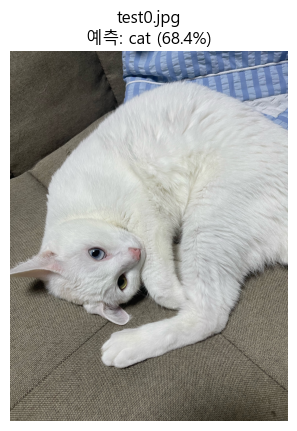

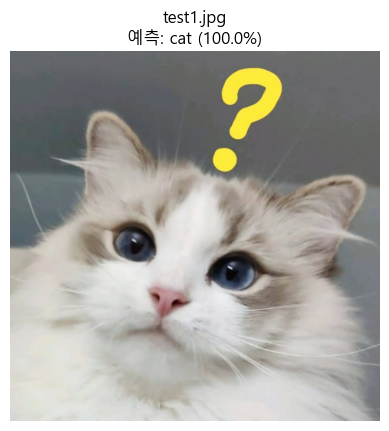

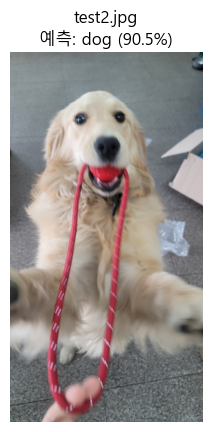

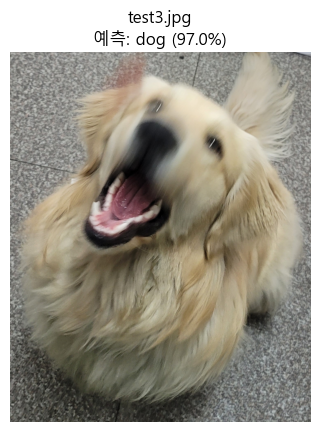

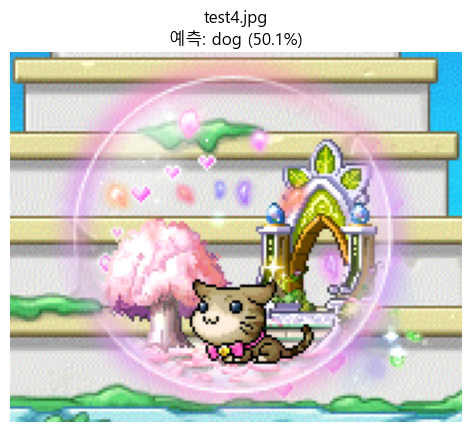

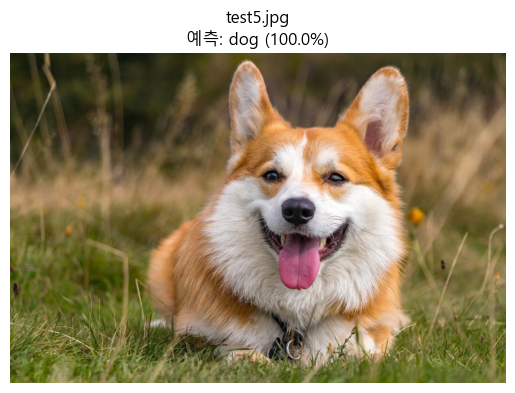

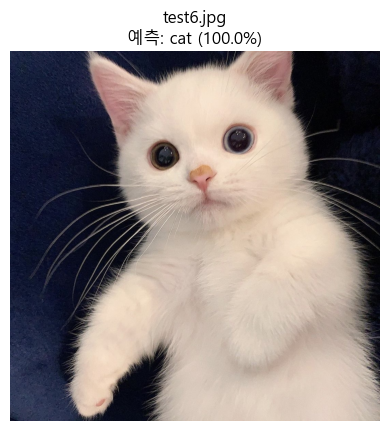

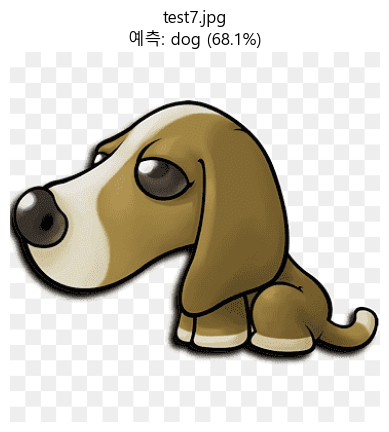

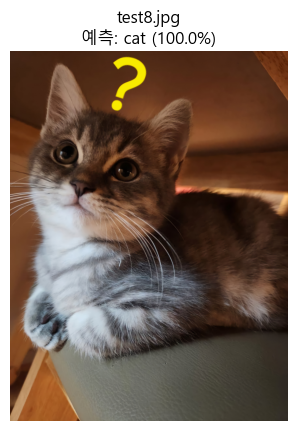

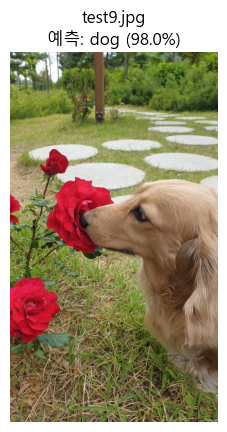

✅ 테스트 정확도: 0.9000


In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 🔧 전처리 동일하게 설정
test_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# 🧪 예측 함수
def predict_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img_tensor = test_tf(img).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_idx = output.argmax(dim=1).item()
        pred_label = train_ds.classes[pred_idx]
        prob = torch.softmax(output, dim=1)[0][pred_idx].item()
    return pred_label, prob

# 📦 전체 테스트 이미지 처리
test_dir = "data/test"
test_images = sorted([f for f in os.listdir(test_dir) if f.endswith((".jpg", ".png"))])
true_labels = [
    "cat", "cat", "dog", "cat", "dog",
    "dog", "cat", "dog", "cat", "dog"
]
  # 실제 라벨이 있으면 여기에 넣고 비교 가능
pred_labels = []

# 🔄 예측 + 시각화
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    pred, prob = predict_image(img_path)
    pred_labels.append(pred)

    # 이미지 출력
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"{img_name}\n예측: {pred} ({prob*100:.1f}%)")
    plt.axis('off')
    plt.show()

# 🎯 실제 정답이 있다면 정확도 비교
# 예시: true_labels = ["cat", "dog", "dog", ...]
if true_labels:
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(true_labels, pred_labels)
    print(f"✅ 테스트 정확도: {acc:.4f}")
